In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.metrics import r2_score


In [14]:
params = {'legend.fontsize': 20,
        'figure.figsize': (10, 7.5),
        'axes.labelsize': 20,
        'xtick.labelsize': 15, 
        'ytick.labelsize': 15, }

plt.style.use('dark_background')

plt.rcParams.update(params)

In [15]:
data = pd.read_csv("IceCreamData.csv").dropna()
data.head(5)


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [16]:
temp = data['Temperature'].values
dolar = data['Revenue'].values


Text(0, 0.5, 'dolar')

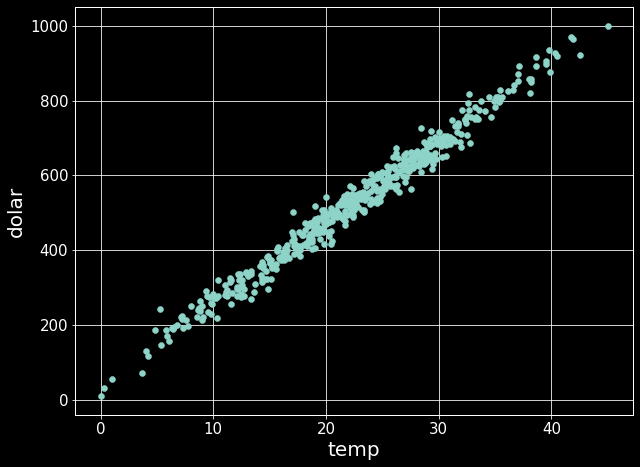

In [17]:
plt.figure()
plt.scatter(temp, dolar)
plt.xlabel('temp')
plt.ylabel('dolar')

In [18]:
t = temp
ones = np.ones(len(t))
b = dolar
A = np.array([ones, t]).T 
AtA = A.T @ A 
Atb = A.T @ b
x_hat = np.linalg.solve(AtA, Atb)


In [19]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1]*t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace


In [20]:
MSE = np.mean((least_square - b)**2)
print('MSE: ', MSE)

MSE:  623.0963653020004


In [21]:
r2 = r2_score(b, least_square)
print('R2 = ', r2)

R2 =  0.979707200117581


In [22]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1,1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1,1))
least_square_sklearn = regr.predict(t.reshape(-1,1))

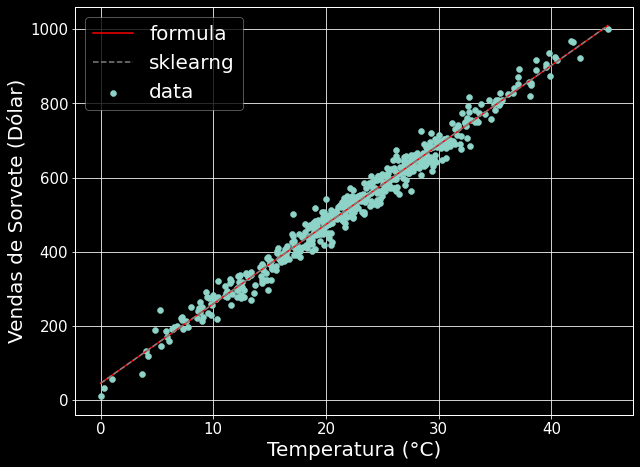

In [32]:
fig, ax = plt.subplots()
plt.scatter(t,b, label='data')
plt.plot(t_linspace, least_square_plot, color='red', label='formula')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', color='gray', label='sklearng')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de Sorvete (Dólar)')
plt.legend()